# 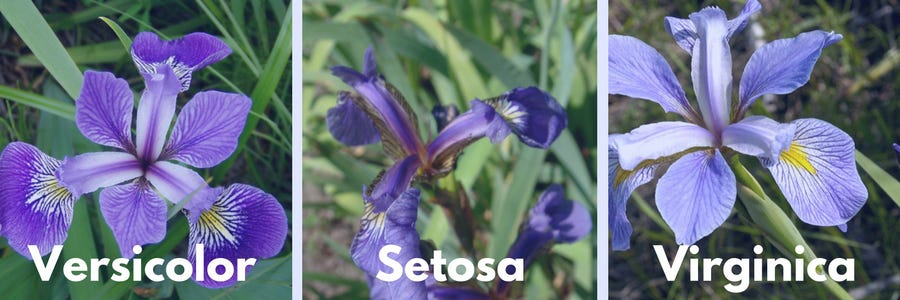

# Introduction:

 The goal of task is to classify and predict the species of Irish flowers based on their sepal and petal measurements. The dataset contains four numerical attributes: sepal length, sepal width, petal length, and petal width, along with the corresponding class labels for each flower. The class labels represent three different species of Irish flowers: Iris Setosa, Iris Versicolour, and Iris Virginica.

# Processing Framework :



Step     	Description

1	        Data Acquisition & Library importing 



2	        Data Preprocessing
            2.1: Null values
            2.2: Outliers
            2.3: Skewness
            2.4: Normalization
            
            
3	        Exploratory Data Analysis (EDA)
4	        Feature Engineering
5	        Data Splitting
6	        Model Selection
7	        Model Training
8	        Model Evaluation
9	        Model Prediction
10	        Model Deployment


#1	        Data Acquisition & Library importing 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [3]:
# datafrmae :
columns=['sepal length cm','sepal width cm','petal length cm','petal width cm','class']
df=pd.read_csv("iris.data",names=columns)

In [4]:
df

,sepal length cm,sepal width cm,petal length cm,petal width cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.head(5)

,sepal length cm,sepal width cm,petal length cm,petal width cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal length cm  150 non-null    float64
 1   sepal width cm   150 non-null    float64
 2   petal length cm  150 non-null    float64
 3   petal width cm   150 non-null    float64
 4   class            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
df.shape

(150, 5)

In [8]:
df.describe()

,sepal length cm,sepal width cm,petal length cm,petal width cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
df.columns

Index(['sepal length cm', 'sepal width cm', 'petal length cm',
       'petal width cm', 'class'],
      dtype='object')

In [10]:
#important to know: Remove unwanted columns.

# df.drop(columns=['name of columns'])

In [11]:
df.head(2)

,sepal length cm,sepal width cm,petal length cm,petal width cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa


In [12]:
df['sepal length cm'].value_counts(),df['sepal width cm'].value_counts(),

(5.0    10
 5.1     9
 6.3     9
 5.7     8
 6.7     8
 5.8     7
 5.5     7
 6.4     7
 4.9     6
 5.4     6
 6.1     6
 6.0     6
 5.6     6
 4.8     5
 6.5     5
 6.2     4
 7.7     4
 6.9     4
 4.6     4
 5.2     4
 5.9     3
 4.4     3
 7.2     3
 6.8     3
 6.6     2
 4.7     2
 7.6     1
 7.4     1
 7.3     1
 7.0     1
 7.1     1
 5.3     1
 4.3     1
 4.5     1
 7.9     1
 Name: sepal length cm, dtype: int64,
 3.0    26
 2.8    14
 3.2    13
 3.1    12
 3.4    12
 2.9    10
 2.7     9
 2.5     8
 3.5     6
 3.3     6
 3.8     6
 2.6     5
 2.3     4
 3.7     3
 2.4     3
 2.2     3
 3.6     3
 3.9     2
 4.4     1
 4.0     1
 4.1     1
 4.2     1
 2.0     1
 Name: sepal width cm, dtype: int64)

In [13]:
# No. of  flowers havig sepal length 5.5 (cm)  = 7 
# No.of flower having biggest sepal length 7.9 (cm) = 1
# No of flowers having minimum sepal lenght 5 (cm)= 10



# No. of  flowers havig sepal width 3 (cm)  = 26 
# No.of flower having biggest widtg  4.4 (cm) = 1
# No of flowers having minimum sepal widtht 2 (cm)= 1

In [14]:
df.head(4)

,sepal length cm,sepal width cm,petal length cm,petal width cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa


In [15]:
df.shape

(150, 5)

 2	        Data Preprocessing

In [16]:
df.head(5)

,sepal length cm,sepal width cm,petal length cm,petal width cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [17]:
# Number of samples on each class:

df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [18]:
df.columns

Index(['sepal length cm', 'sepal width cm', 'petal length cm',
       'petal width cm', 'class'],
      dtype='object')

In [19]:
#2.1 Null values :

df.isnull().sum()

sepal length cm    0
sepal width cm     0
petal length cm    0
petal width cm     0
class              0
dtype: int64

In [20]:
# heatmap of null values

<AxesSubplot:title={'center':'Visualization of Null values '}>

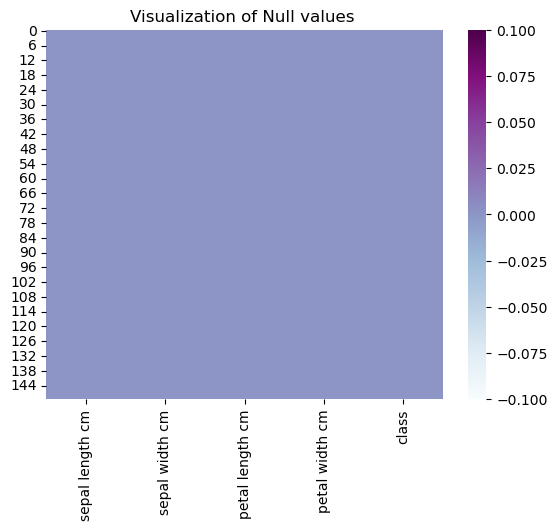

In [21]:
plt.title("Visualization of Null values ")
sns.heatmap(data=df.isnull(),cmap='BuPu', center=None,robust=False,annot=None,)


In [22]:
# No Null values found

In [23]:
#2.2   Outliers :


In [24]:
df.head(5)

,sepal length cm,sepal width cm,petal length cm,petal width cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [25]:

df.columns

Index(['sepal length cm', 'sepal width cm', 'petal length cm',
       'petal width cm', 'class'],
      dtype='object')

<AxesSubplot:title={'center':'Visualization  of Outliers (Iris flowerd Database) '}>

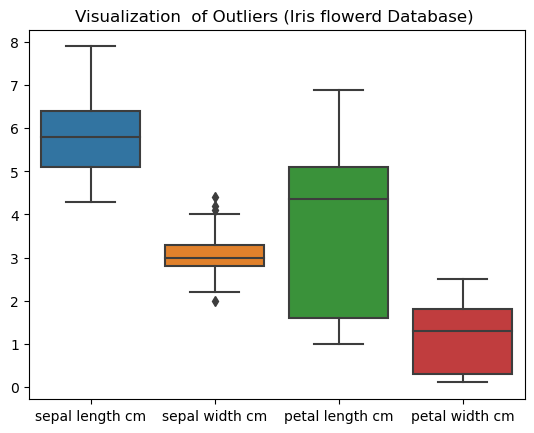

In [26]:

plt.title("Visualization  of Outliers (Iris flowerd Database) ")
sns.boxplot(data=df)


individual Check : 

In [27]:
df.columns

Index(['sepal length cm', 'sepal width cm', 'petal length cm',
       'petal width cm', 'class'],
      dtype='object')

In [28]:
# Outlier detected in Sepal Length attribute in ourdataframe .

In [29]:
# Removing outliers from :sepal width cm

Min: 2.2
Max: 3.9


<AxesSubplot:title={'center':'Expected outcome of Sepal width  with no outliers (by adjusting threshold value)'}>

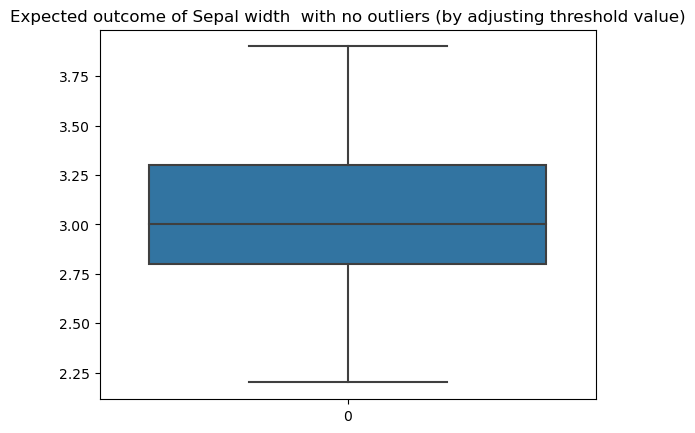

In [30]:
# Z-score methode:


# Calculate the Z-score for the attribute
z_scores = (df['sepal width cm'] - df['sepal width cm'].mean()) / df['sepal width cm'].std()

# Define a threshold (e.g., ±3) to identify outliers
threshold = 2

# Remove outliers
df = df[abs(z_scores) <= threshold]

# Print statistics of the modified DataFrame
print("Min:", df['sepal width cm'].min())
print("Max:", df['sepal width cm'].max())

# Plot the boxplot to visualize outliers

plt.title("Expected outcome of Sepal width  with no outliers (by adjusting threshold value)")
sns.boxplot(data=df['sepal width cm'])


<AxesSubplot:title={'center':'petal width cm'}>

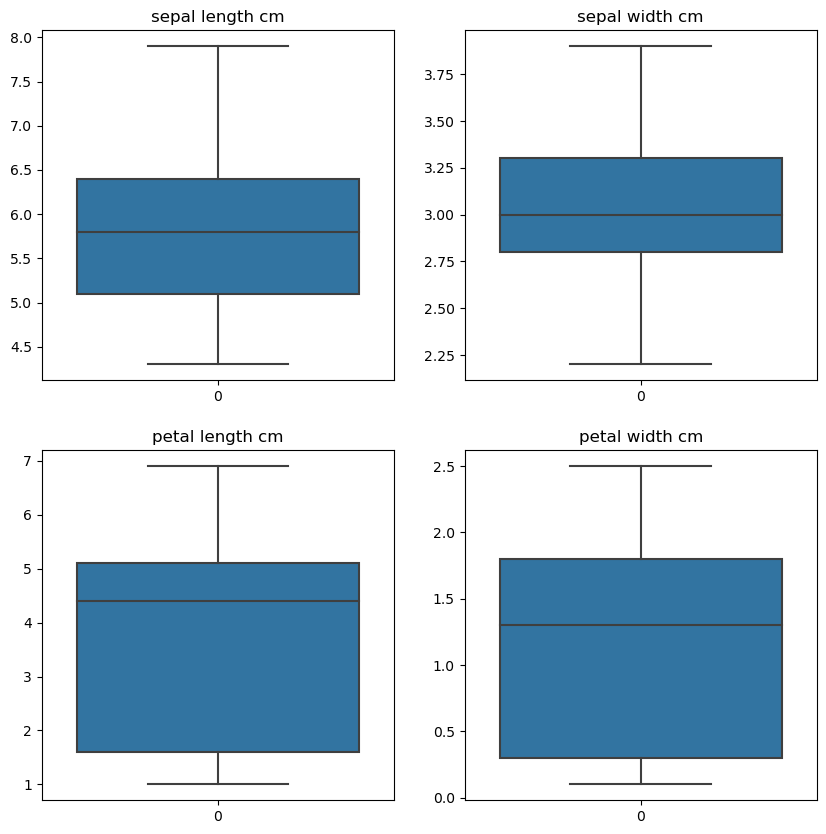

In [31]:
plt.figure(figsize=(10,10))



plt.subplot(2,2,1)
plt.title('sepal length cm')
sns.boxplot(data=df['sepal length cm']),

plt.subplot(2,2,2)
plt.title('sepal width cm')
sns.boxplot(data=df['sepal width cm'])


plt.subplot(2,2,3)
plt.title('petal length cm')
sns.boxplot(data=df['petal length cm'])

plt.subplot(2,2,4)
plt.title('petal width cm')
sns.boxplot(data=df['petal width cm'])


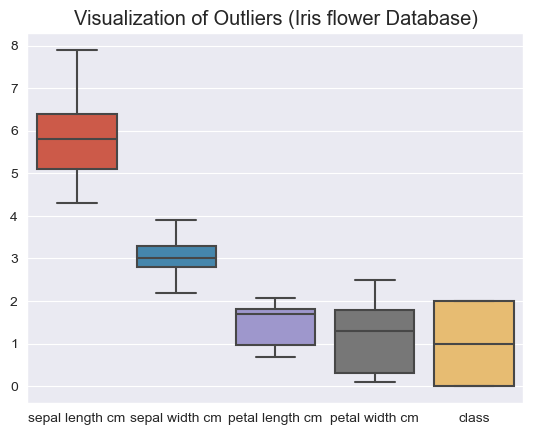

In [170]:
# Set the desired style
sns.set_style('darkgrid')

# Set the plot title
plt.title("Visualization of Outliers (Iris flower Database)")

# Create a boxplot using seaborn
sns.boxplot(data=df)

# Show the plot
plt.show()

In [33]:
# good to go next :✌✔

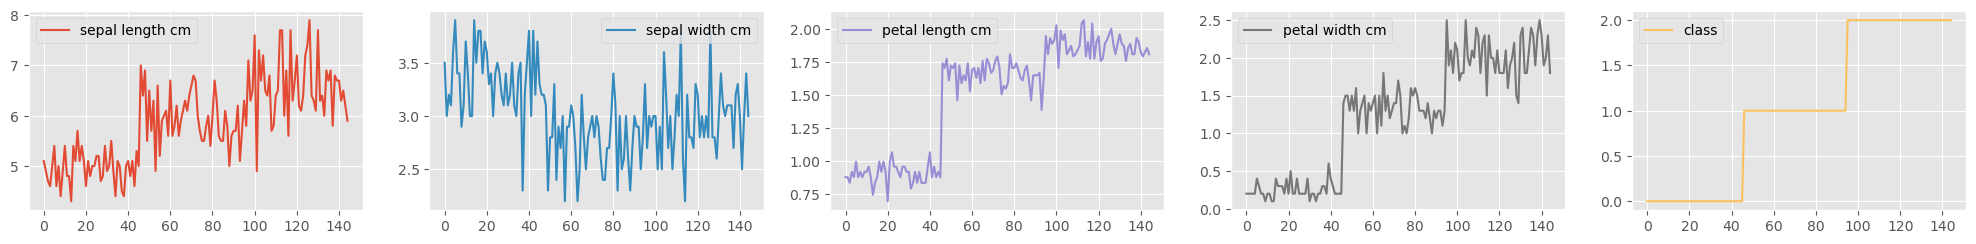

In [167]:

plt.style.use('ggplot')  # Set the desired style

df.plot(kind='line', subplots=True, figsize=(25,15), layout=(5,5), use_index=False)
plt.show()  # Show the plot


In [34]:
#2.3: Skewness

In [36]:
df.columns

Index(['sepal length cm', 'sepal width cm', 'petal length cm',
       'petal width cm', 'class'],
      dtype='object')

G:\anaconda\new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\anaconda\new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
G:\anaconda\new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms)

skew of sepal length 0.276073
skew of sepal width 0.094078
skew of petal length -0.338064
skew of petal width -0.162183


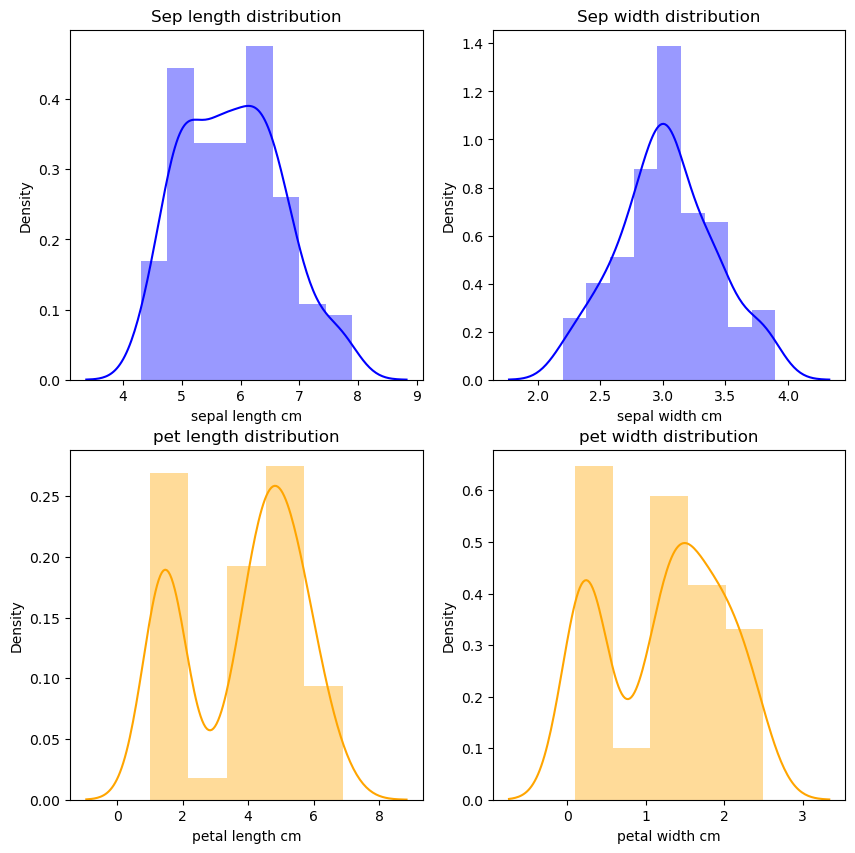

In [37]:
# Checking skewness :

plt.figure(figsize=(10,10))



plt.subplot(2,2,1)
plt.title("Sep length distribution")
sns.distplot(df['sepal length cm'],color='blue')
print('skew of sepal length %f'% df['sepal length cm'].skew())



plt.subplot(2,2,2)
plt.title("Sep width distribution")
sns.distplot(df['sepal width cm'],color='blue')
print('skew of sepal width %f'% df['sepal width cm'].skew())





plt.subplot(2,2,3)
plt.title("pet length distribution")
sns.distplot(df['petal length cm'],color='Orange')
print('skew of petal length %f'% df['petal length cm'].skew())




plt.subplot(2,2,4)
plt.title("pet width distribution")
sns.distplot(df['petal width cm'],color='orange')
print('skew of petal width %f'% df['petal width cm'].skew())

In [38]:
df.columns

Index(['sepal length cm', 'sepal width cm', 'petal length cm',
       'petal width cm', 'class'],
      dtype='object')

In [39]:
# skeweed data attributes are :  petal length :

In [40]:
# Apply logarithmic transformation to remove skewness
df['petal length cm'] = np.log1p(df['petal length cm'])

# Calculate the skewness after transformation
transformed_skewness = df['petal length cm'].skew()

# Check the skewness value after transformation
print("Transformed Skewness:", transformed_skewness)

Transformed Skewness: -0.594015789220334


C:\Users\dell\AppData\Local\Temp\ipykernel_12528\1757712362.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['petal length cm'] = np.log1p(df['petal length cm'])


In [41]:
# Check :

skew of petal length -0.594016


G:\anaconda\new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


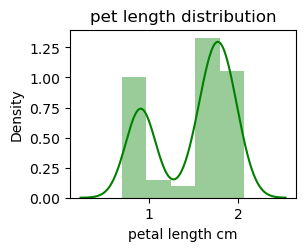

In [42]:
plt.subplot(2,2,3)
plt.title("pet length distribution")
sns.distplot(df['petal length cm'],color='green')
print('skew of petal length %f'% df['petal length cm'].skew())


In [43]:
df.head(5)

,sepal length cm,sepal width cm,petal length cm,petal width cm,class
0,5.1,3.5,0.875469,0.2,Iris-setosa
1,4.9,3.0,0.875469,0.2,Iris-setosa
2,4.7,3.2,0.832909,0.2,Iris-setosa
3,4.6,3.1,0.916291,0.2,Iris-setosa
4,5.0,3.6,0.875469,0.2,Iris-setosa


In [44]:
df.columns

Index(['sepal length cm', 'sepal width cm', 'petal length cm',
       'petal width cm', 'class'],
      dtype='object')

In [45]:
# 2.4: Normalization

In [46]:
 #checking if attributes are normalized or not 

In [47]:
"""attribute_data = df['petal length cm']

# Calculate the mean and standard deviation of the 'attribute' column
mean = attribute_data.mean()
std = attribute_data.std()

# Check if the 'attribute' column is normalized
if np.isclose(mean, 0, atol=1e-5) and np.isclose(std, 1, atol=1e-5):
    print("The 'attribute' column is normalized.")
else:
    print("The 'attribute' column is not normalized.")"""

'attribute_data = df[\'petal length cm\']\n\n# Calculate the mean and standard deviation of the \'attribute\' column\nmean = attribute_data.mean()\nstd = attribute_data.std()\n\n# Check if the \'attribute\' column is normalized\nif np.isclose(mean, 0, atol=1e-5) and np.isclose(std, 1, atol=1e-5):\n    print("The \'attribute\' column is normalized.")\nelse:\n    print("The \'attribute\' column is not normalized.")'

In [48]:
# check :



"""
# Plotting a histogram of the normalized 'attributes' column
plt.hist(df['petal length cm'], bins=20)
plt.xlabel('Normalized Values')
plt.ylabel('Frequency')
plt.title('Normalized Distribution of Attributes')
plt.show()"""


"\n# Plotting a histogram of the normalized 'attributes' column\nplt.hist(df['petal length cm'], bins=20)\nplt.xlabel('Normalized Values')\nplt.ylabel('Frequency')\nplt.title('Normalized Distribution of Attributes')\nplt.show()"

In [49]:
df.columns

Index(['sepal length cm', 'sepal width cm', 'petal length cm',
       'petal width cm', 'class'],
      dtype='object')


# 3	        Exploratory Data Analysis (EDA)

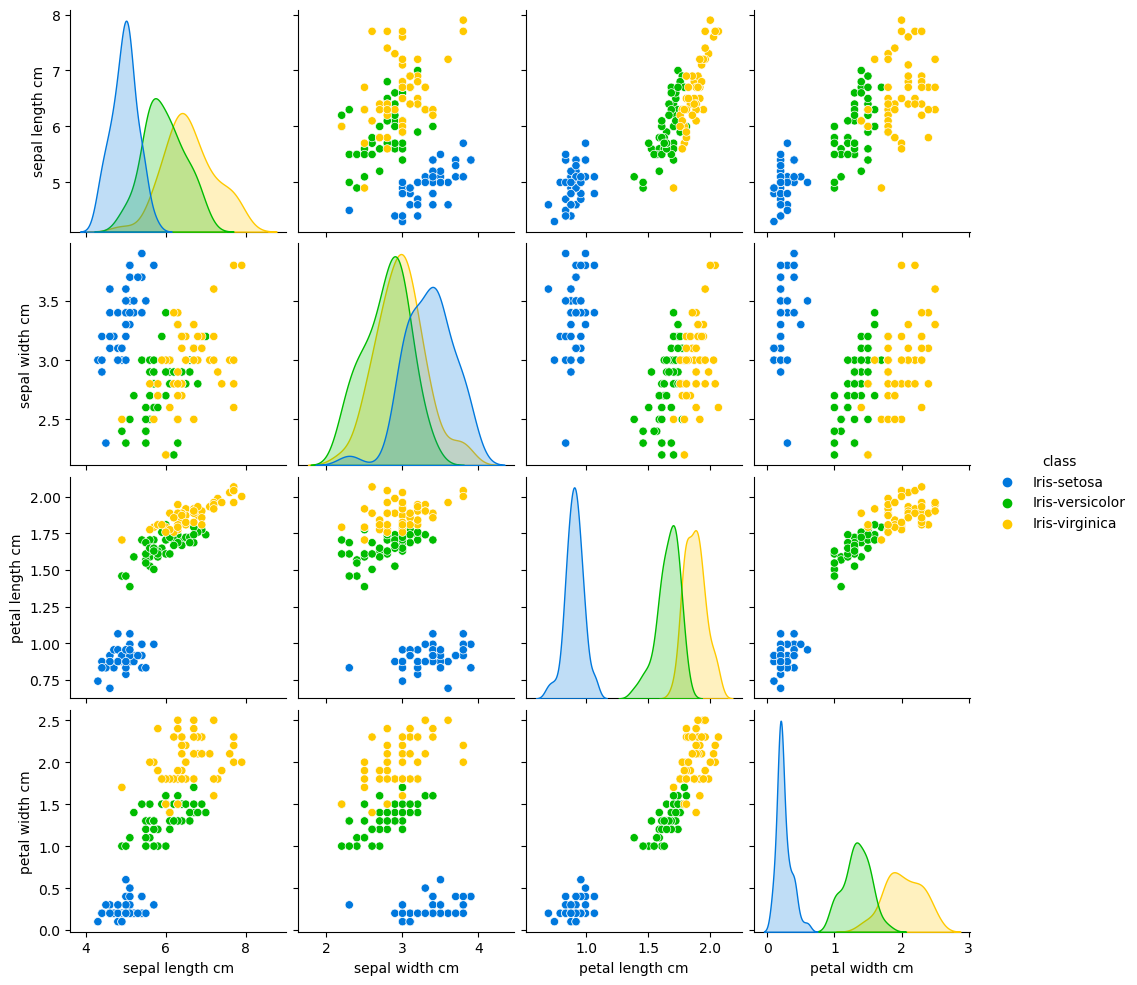

In [50]:
sns.pairplot(df,hue='class',palette='nipy_spectral')

In [51]:
df.columns

Index(['sepal length cm', 'sepal width cm', 'petal length cm',
       'petal width cm', 'class'],
      dtype='object')

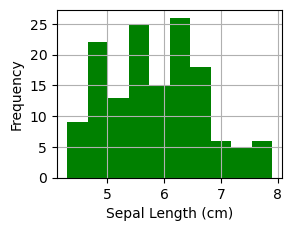

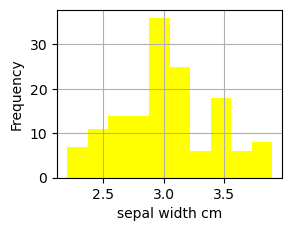

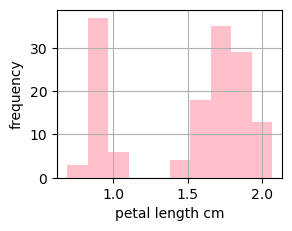

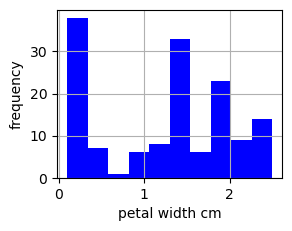

In [52]:
plt.subplot(2,2,1)

df['sepal length cm'].hist(color='green')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.show()


plt.subplot(2,2,2)
df['sepal width cm'].hist(color='Yellow')
plt.xlabel('sepal width cm')
plt.ylabel('Frequency')
plt.show()

plt.subplot(2,2,3)
df['petal length cm'].hist(color='pink')
plt.xlabel('petal length cm')
plt.ylabel("frequency")
plt.show()



plt.subplot(2,2,4)
df['petal width cm'].hist(color='blue')
plt.xlabel('petal width cm')
plt.ylabel("frequency")
plt.show()





In [53]:
#df['sepal length cm'].value_counts()

In [54]:
# corelation:
df.corr()

,sepal length cm,sepal width cm,petal length cm,petal width cm
sepal length cm,1.000000,-0.115227,0.853863,0.827138
sepal width cm,-0.115227,1.000000,-0.436318,-0.315596
petal length cm,0.853863,-0.436318,1.000000,0.952803
petal width cm,0.827138,-0.315596,0.952803,1.000000


<AxesSubplot:>

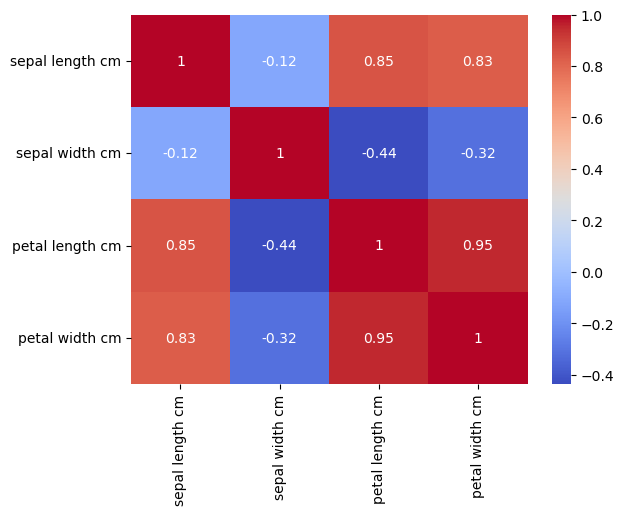

In [55]:
#visualization
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [56]:
# Top :
# 1. petal length cm :: petal width cm 95%
#2.  sepal length cm :: petal length cm 85%

In [57]:
df['class'].value_counts()

Iris-virginica     50
Iris-versicolor    49
Iris-setosa        46
Name: class, dtype: int64

# ** imp note :Using Label Encoding:

iris-setosa: 0
iris-versicolor :  1
In this case, Label Encoding assigns numerical labels to each class based on their order. However, it may introduce unintended ordinality. For example, the algorithm may assume that iris-setosa (1) is somehow "greater" than iris-versicolor (0), which may not be appropriate for the problem.

Using One-Hot Encoding:

iris-setosa: [1, 0, 0]
iris-versicolor : [0, 1, 0]

In One-Hot Encoding, a binary column is created for each unique category. Each flower has its own column, and the presence of a particular flower is indicated by a 1 in the corresponding column. This representation avoids introducing ordinality and ensures that each category is treated independently.

In this example, if we apply Label Encoding, the algorithm may mistakenly interpret the encoded labels as numeric values and consider the order between flowers. On the other hand, One-Hot Encoding represents each flower independently without assuming any ordinal relationship.

Ultimately, the choice between Label Encoding and One-Hot Encoding depends on the nature of the categorical variable and the specific requirements of the problem.

In [58]:
  # here we will use Lable encoding :

In [59]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [60]:
df['class']=le.fit_transform(df['class'])

C:\Users\dell\AppData\Local\Temp\ipykernel_12528\3286789376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['class']=le.fit_transform(df['class'])


In [61]:
df.head()

,sepal length cm,sepal width cm,petal length cm,petal width cm,class
0,5.1,3.5,0.875469,0.2,0
1,4.9,3.0,0.875469,0.2,0
2,4.7,3.2,0.832909,0.2,0
3,4.6,3.1,0.916291,0.2,0
4,5.0,3.6,0.875469,0.2,0


In [62]:
df.tail(5)

,sepal length cm,sepal width cm,petal length cm,petal width cm,class
145,6.7,3.0,1.824549,2.3,2
146,6.3,2.5,1.791759,1.9,2
147,6.5,3.0,1.824549,2.0,2
148,6.2,3.4,1.856298,2.3,2
149,5.9,3.0,1.808289,1.8,2


In [ ]:
Step     	Description

1	        Data Acquisition & Library importing 🆗👍



2	        Data Preprocessing 🆗👍
            2.1: Null values
            2.2: Outliers
            2.3: Skewness
            2.4: Normalization
            
            
3	        Exploratory Data Analysis (EDA) 🆗👍
4	        Feature Engineering 🆗👍
5	        Data Splitting
6	        Model Selection
7	        Model Training
8	        Model Evaluation
9	        Model Prediction
10	        Model Deployment
m98u

5	        Data Splitting & 6	        Model Selection

In [159]:
df.columns

Index(['sepal length cm', 'sepal width cm', 'petal length cm',
       'petal width cm', 'class'],
      dtype='object')

In [1]:
from sklearn.model_selection import train_test_split

#train-70
#test-10

x=df.drop(columns=['class'])
Y=df['class']


x_train,x_test,Y_train,Y_test=train_test_split(x,Y,test_size=0.30,random_state=0)

KeyboardInterrupt: 

In [ ]:
# importing basic classification model : Logistic regression:


from sklearn.linear_model import LogisticRegression
model_LR=LogisticRegression()                                                    # Defining model
                                                                              
    
    

In [ ]:
#  to train model 

model_LR.fit(x_train,Y_train)

In [ ]:
#Evaluate the model
accuracy = model_LR.score(x_test, Y_test)*100       #or    print("Accuracy:",model_LR.score(x_test,Y_test)*100)  
print("Accuracy:", accuracy)

In [ ]:
prediction1=model_LR.predict(x_test)

# Calculate the accuracy

from sklearn.metrics import accuracy_score
print(accuracy_score(Y_test,prediction1)*100)

In [165]:
# Adetaied classification report :

from sklearn.metrics import classification_report
print(classification_report(Y_test,prediction1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      0.88      0.91        17
           2       0.87      0.93      0.90        14

    accuracy                           0.93        44
   macro avg       0.93      0.94      0.94        44
weighted avg       0.93      0.93      0.93        44



In [166]:
New_input_to_model=np.array([[3,2,1.3,0.9],[7,4.7,3,0.1],[5.1,3.3,1,0.7]])

#prediction of the class from the input

prediction=model_LR.predict(New_input_to_model)
print("prediction of class :{}".format(prediction))

prediction of class :[0 1 0]


G:\anaconda\new\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# prediction of class :[0 1 0]

In [139]:
# high level models : decison tree 

from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()

In [140]:
model.fit(x_train,Y_train)

DecisionTreeClassifier()

In [141]:
print("Accuracy:",model.score(x_test,Y_test)*100) 

Accuracy: 93.18181818181817


In [143]:
# another model : support vector algo:

from sklearn.svm import SVC
model_svc=SVC()
model_svc.fit(x_train,Y_train)

SVC()

In [144]:
model_svc.fit(x_train,Y_train)

SVC()

In [145]:
print("Accuracy:",model_svc.score(x_test,Y_test)*100) 

Accuracy: 95.45454545454545


In [146]:
# Classification report ::

from sklearn.model_selection import GridSearchCV
from sklearn.utils import class_weight

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}
grid_search = GridSearchCV(estimator=LogisticRegression(class_weight='balanced'), param_grid=param_grid, cv=5)
grid_search.fit(x_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Create a logistic regression model with the best hyperparameters
model = LogisticRegression(C=best_params['C'], penalty=best_params['penalty'], solver=best_params['solver'], class_weight='balanced')

# Fit the model to the training data
model.fit(x_train, Y_train)

# Evaluate the model
accuracy = model.score(x_test, Y_test)
print("Accuracy:", accuracy)
